In [2]:
#handling missing data
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [3]:
#load the dataset 
df = sns.load_dataset('iris')

#missing data 
df.loc[5:10, 'sepal_length'] = None

print(df.isnull().sum() )


sepal_length    6
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64


In [4]:
# Option 1: Drop rows with missing values
df_dropped = df.dropna()

# Option 2: Fill missing values with mean
df_filled = df.fillna(df['sepal_length'].mean())

In [ ]:
# 🔡 Step 2: Encoding Categorical Variables
from sklearn.preprocessing import LabelEncoder

# Encode the species column
le = LabelEncoder()
df['species_encoded'] = le.fit_transform(df['species'])

# See encoding
print(df[['species', 'species_encoded']].head())


  species  species_encoded
0  setosa                0
1  setosa                0
2  setosa                0
3  setosa                0
4  setosa                0


In [ ]:
# Step 3 : feature scaling
from sklearn.preprocessing import StandardScaler

# Drop non-numeric & prepare features
X = df.drop(['species', 'species_encoded'], axis=1).select_dtypes(include='number')

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Convert back to DataFrame
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)

print(X_scaled_df.head())


   sepal_length  sepal_width  petal_length  petal_width
0     -0.954265     1.019004     -1.340227    -1.315444
1     -1.198775    -0.131979     -1.340227    -1.315444
2     -1.443284     0.328414     -1.397064    -1.315444
3     -1.565539     0.098217     -1.283389    -1.315444
4     -1.076520     1.249201     -1.340227    -1.315444


In [9]:
# # 🔢 Step 4: outlier detection 
from scipy.stats import zscore 
z_scores = zscore(X)
outliers = (abs(z_scores)>3 ).any(axis=1)
print(df[outliers])

    sepal_length  sepal_width  petal_length  petal_width species  \
15           5.7          4.4           1.5          0.4  setosa   

    species_encoded  
15                0  


In [ ]:
# Step 5: Train-Test Split
from sklearn.model_selection import train_test_split

x= X_scaled_df
y=df['species_encoded']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(x,ytest_size=0.2, random_state=42)
print("Train shape:", X_train.shape)
print("Test shape:", X_test.shape)


In [12]:
df['sepal_area'] = df['sepal_length'] * df['sepal_width']
df['petal_area'] = df['petal_length'] * df['petal_width']
print(df[['sepal_area', 'petal_area']].head())

   sepal_area  petal_area
0       17.85        0.28
1       14.70        0.28
2       15.04        0.26
3       14.26        0.30
4       18.00        0.28


In [13]:
bins=[0,5.5,6.5,8]
labels =['short','medium','long']
df['sepal_size']=pd.cut(df['sepal_length'], bins=bins, labels=labels)
print(df[['sepal_length','sepal_size']].head())


   sepal_length sepal_size
0           5.1      short
1           4.9      short
2           4.7      short
3           4.6      short
4           5.0      short


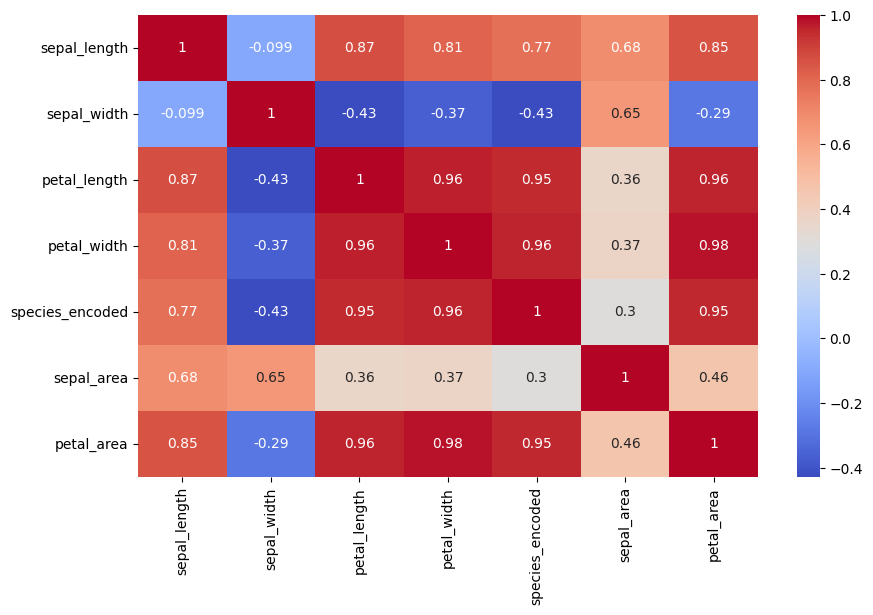

In [14]:
# feature selection 
import seaborn as sns
import matplotlib.pyplot as plt

# Only numeric
corr_matrix = df.select_dtypes(include='number').corr()

plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()
